In [1]:
import time
print(time.time())
time.localtime(time.time())


1593336709.5444627


time.struct_time(tm_year=2020, tm_mon=6, tm_mday=28, tm_hour=18, tm_min=31, tm_sec=49, tm_wday=6, tm_yday=180, tm_isdst=0)

In [2]:
import pandas as pd

filename = "logs.csv"

data = pd.read_csv(filename)
datasize = data.index.stop

data['t2-1'] = data['t2-01'].shift(periods = 1)
data['t2-2'] = data['t2-02'].shift(periods = 1)

data = data.dropna(axis =0)
data = data.drop(columns = ['t2-01', 't2-02'])
print(data.columns) 
data = data[['t1-1', 't1-2', 't1-3', 't2-1', 't2-2', 't3']]

X1 = data.drop(columns = ['t1-2', 't1-3'])
y1 = data['t1-2']

X2 = data.drop(columns = [        't1-3'])
y2 = data['t1-3']

X1.head(10)

Index(['t1-1', 't1-2', 't1-3', 't3', 't2-1', 't2-2'], dtype='object')


,t1-1,t2-1,t2-2,t3
1,1127,318.0,318.0,1
2,1140,574.0,446.0,2
3,1080,526.0,473.0,3
4,1090,449.0,467.0,4
5,1120,481.0,470.0,0
6,1318,519.0,519.0,1
7,1155,326.0,423.0,2
8,1170,391.0,412.0,3
9,1230,337.0,393.0,4
10,1110,404.0,395.0,0


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

rf_model = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 42)

print(rf_model)


## TODO : X_train, y_train 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(rf_model.feature_importances_)
print(X_test)
X_test.to_csv('sleeptest.csv')
print(y_pred)

print(rf_model.predict(X_test.tail(1)))
test = pd.DataFrame(columns = ['t1-1', 't3', 't2-1', 't2-2'])
test.loc[0] = [1080,  246.0, 315.0,  3]
print(rf_model.predict(test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
[0.8862635  0.02032921 0.03500495 0.05840234]
    t1-1   t2-1   t2-2  t3
28  1080  246.0  315.0   3
17  1385  121.0  253.0   2
13  1350  410.0  404.0   3
23  1230  362.0  498.0   3
9   1230  337.0  393.0   4
10  1110  404.0  395.0   0
[1218.245 1657.1   1667.925 1485.28  1471.23  1287.965]
[1287.965]
[1218.245]


In [4]:
import matplotlib.pyplot as plt
print(X_test.reset_index()['t1-1'])
print(y_pred)
print(y_test.reset_index())

plt.plot(X_test.reset_index()['t1-1'], c = 'r')
plt.plot(y_pred, c = 'b')
plt.plot(y_test.reset_index()['t1-2'], c = 'k')


0    1080
1    1385
2    1350
3    1230
4    1230
5    1110
Name: t1-1, dtype: int64
[1218.245 1657.1   1667.925 1485.28  1471.23  1287.965]
   index  t1-2
0     28  1344
1     17  1739
2     13  1585
3     23  1340
4      9  1492
5     10  1258


In [5]:
import pickle

with open("timemodel1.pickle",'wb') as fw:
  pickle.dump(rf_model,fw)

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

rf_model = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 42)

print(rf_model)


## TODO : X_train, y_train 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(rf_model.feature_importances_)
print(y_pred)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
[0.3765657  0.559751   0.0150466  0.02526329 0.02337341]
[1476.605 1850.925 1818.51  1489.205 1626.49  1451.84 ]


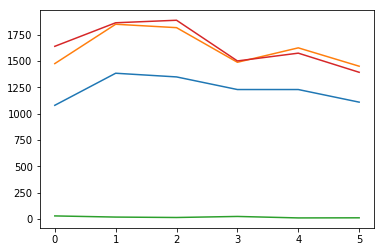

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_test.reset_index()['t1-1'])
plt.plot(y_pred)
plt.plot(y_test.reset_index())

In [8]:
import pickle

with open("timemodel2.pickle",'wb') as fw:
  pickle.dump(rf_model,fw)

In [1]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', rf_model)
        ])
pipe.fit(X_train, y_train)

ypipe=pipe.predict(X_test)

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


NameError: name 'rf_model' is not defined